<a href="https://colab.research.google.com/github/RoshanPanda/Data_analysis_and_ML/blob/master/house_price_pred(under_construction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
#from os.path import exists
#from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
#platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
#cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
#accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train=pd.read_csv('sample_data/california_housing_train.csv')
df_test=pd.read_csv('sample_data/california_housing_test.csv')

df_train.head(5)

#print(df_test.head(5))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:

df_test.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


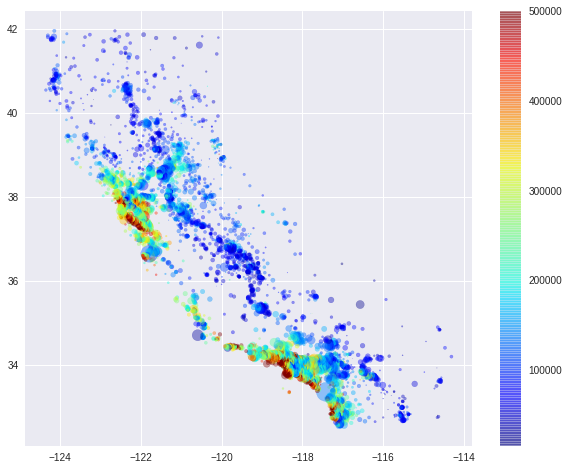

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(df_train['longitude'],df_train['latitude'],alpha=0.4,s=df_train["population"]/100,c=df_train["median_house_value"],cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.show()

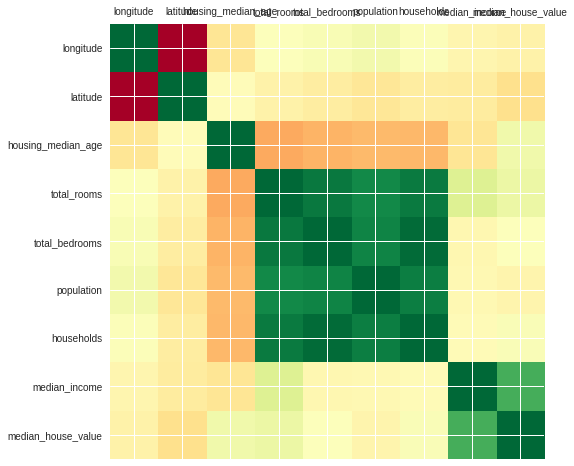

In [5]:
##looking for co-relations
import numpy as np
corr_matrix=df_train.corr()
labels=[c for c in corr_matrix.columns ]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.matshow(corr_matrix,cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

In [6]:
corr_matrix[corr_matrix["median_house_value"]>0.1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55795ac630>,
      dtype=object)

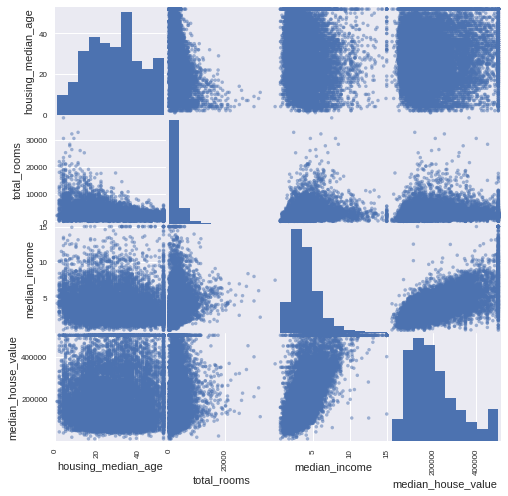

In [7]:
from pandas.tools.plotting import scatter_matrix
related_columns=["housing_median_age","total_rooms","median_income","median_house_value"]
scatter_matrix(df_train[related_columns],figsize=(8,8))


In [8]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [0]:


from sklearn.base import BaseEstimator, TransformerMixin
room_t, bedroom_t, population, household= 3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, x,y=None):
    return self
  def transform(self, x, y=None):
    rooms_per_household=x[:,room_t]/x[:,household]
    population_per_household=x[:,population]/x[:,household]
    if self.add_bedrooms_per_room:
      bedrooms_per_room=x[:,bedroom_t]/x[:,room_t]
      return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[x,rooms_per_household,population_per_household]

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pipe_line=Pipeline([
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [0]:
##attribute combination

df_train["rooms_per_household"]=df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"]=df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]


In [49]:
corr_matrix=df_train.corr()
corr_matrix[corr_matrix["median_house_value"]>0.1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.146234,0.133441,0.006274
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.125385,-0.182914,-0.035327
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.317311,-0.617638,-0.009826
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.150081,-0.258190,-0.042764
rooms_per_household,-0.032894,0.110017,-0.146234,0.125385,-0.006480,-0.074806,-0.084505,0.317311,0.150081,1.000000,-0.408200,0.001476


In [0]:
to be continued

In [0]:
req_coll=["housing_median_age","total_rooms","rooms_per_household","bedrooms_per_room","population_per_household"]
train_features=df_train[req_coll]
train_label=df_train['median_house_value']
#test_features=df_test[df_train.columns[:-1]]
test_labels=df_test["median_house_value"]

In [53]:
test_labels.head()

0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64

In [0]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
train_features=pd.DataFrame(scaler.fit_transform(train_features), columns=train_features.columns)
#train_features.head()
#test_features=pd.DataFrame(min_max_scaler.fit_transform(test_features), columns=test_features.columns)

In [0]:
#df_select=df_train.copy()
#df=df_select.drop("median_house_value",axis=1)
#from sklearn.feature_selection import SelectKBest,chi2
#selector=SelectKBest(chi2,k=5)
#selected_features=selector.fit(df,train_label)
#indices_selected=selected_features.get_support(indices=True)
#columns_selected=[df.columns[i] for i in indices_selected]
#xval=df[columns_selected]
#xval.columns

In [0]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestClassifier as RF

In [105]:
lr=LinearRegression()
lr.fit(train_features,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
test_data=pipe_line.fit_transform(df_test.values)
test_fdf=pd.DataFrame(test_data, columns=df_train.columns)
test_fdf_feaures=test_fdf[req_coll]

In [107]:
from sklearn.metrics import r2_score

lr_predict=lr.predict(test_fdf_feaures)

#r2_score(lr_predict,test_labels.values)
n=list(zip(lr_predict,test_labels.values))
n[:20]


[(224476.43647905186, 344700.0),
 (226462.14210553284, 176500.0),
 (224329.33435808282, 270500.0),
 (177635.7162306298, 330000.0),
 (175167.10071774034, 81700.0),
 (207266.43753577286, 67000.0),
 (219088.27523599475, 67000.0),
 (186760.8604112789, 166900.0),
 (189479.93131989284, 194400.0),
 (190550.35200481658, 164200.0),
 (203194.06925666978, 125000.0),
 (199549.4701598478, 58300.0),
 (214817.54516355417, 252600.0),
 (199827.04212702034, 231200.0),
 (203649.50995414093, 222500.0),
 (201133.33445250077, 153100.0),
 (172386.16932388305, 181300.0),
 (208614.72479119786, 137500.0),
 (208245.90135754, 300000.0),
 (282260.8054427811, 414300.0)]

In [108]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(test_labels,lr_predict)
np.sqrt(rmse)

110608.50053729415

In [109]:
dt_m=DT()
dt_m.fit(train_features,train_label)

dt_pred=dt_m.predict(test_fdf_feaures)
dt_rmse=mean_squared_error(test_labels,dt_pred)
np.sqrt(dt_rmse)

150629.89641178475